In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Read the CSV file into a DataFrame
file_path = './data.csv' 
data = pd.read_csv(file_path)

# Define the target column (dependent variable)
target_column = 'Adj Close'

# Separate features (X) and target variable (y)
X = data.drop(columns=['Adj Close', 'Date', 'Open', 'Close', 'Low', 'High']) 
y = data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Model creation with an explicit Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape
    Dense(64, activation='relu'),     # First dense layer
    Dense(32, activation='relu'),     # Second dense layer
    Dense(1, activation='linear')     # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [3]:
# fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15909.9375 - mae: 124.8779 - val_loss: 12570.6963 - val_mae: 110.9989
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9938.5439 - mae: 97.7900 - val_loss: 1820.4097 - val_mae: 40.1739
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 942.2620 - mae: 25.8825 - val_loss: 354.2762 - val_mae: 15.5039
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324.8497 - mae: 15.0724 - val_loss: 288.9216 - val_mae: 14.1581
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 297.1003 - mae: 14.4384 - val_loss: 258.0878 - val_mae: 13.3289
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 239.8471 - mae: 12.8708 - val_loss: 223.9696 - val_mae: 12.3751
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 230.2646 - mae: 12.5469 - val_loss: 191.1583 - val_mae: 11.3722
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 181.4218 - mae: 11.1923 - val_loss: 163.5609 - val_mae: 10.4331
Epoch 9/

In [4]:
# evaluation on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# make prediction
y_pred = model.predict(X_test)


Test Loss: 6.3962, Test MAE: 1.9927
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error (MSE): 6.3962
Root Mean Squared Error (RMSE): 2.5291
Mean Absolute Error (MAE): 1.9927
R2 Score: 0.9795


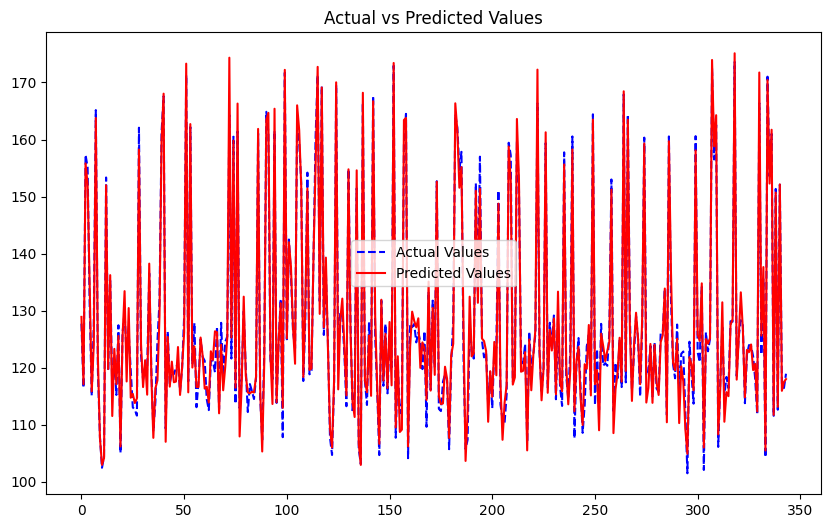

In [6]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 6))

# Plotting the actual values with blue dashed lines
plt.plot(y_test.values, label="Actual Values", color='blue', linestyle='dashed')

# Plotting the predicted values with a red line
plt.plot(y_pred, label="Predicted Values", color='red')

# Adding a title to the plot
plt.title("Actual vs Predicted Values")

# Adding a legend to distinguish the lines
plt.legend()

# Displaying the plot
plt.show()


C:\Users\gulse\AppData\Local\Temp\ipykernel_22024\848428012.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],


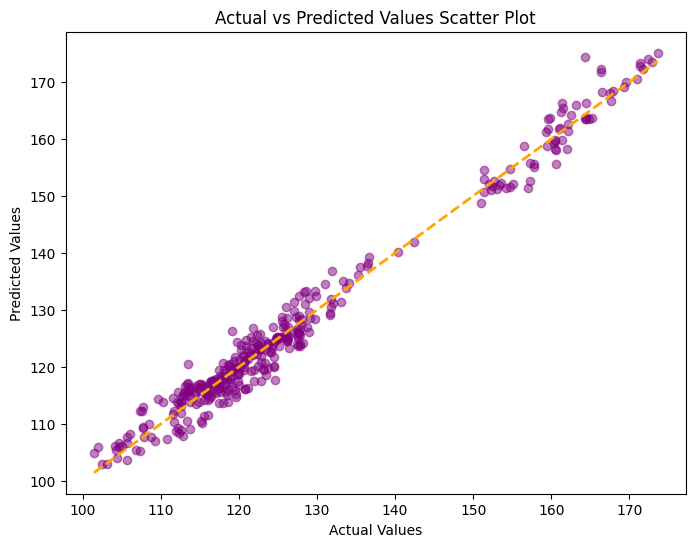

In [7]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')

# Labeling the x-axis as "Actual Values"
plt.xlabel("Actual Values")

# Labeling the y-axis as "Predicted Values"
plt.ylabel("Predicted Values")

# Adding a title to the plot
plt.title("Actual vs Predicted Values Scatter Plot")

# Plotting the y=x line to visualize perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'k--', color="orange", lw=2)  # y=x line

# Displaying the plot
plt.show()

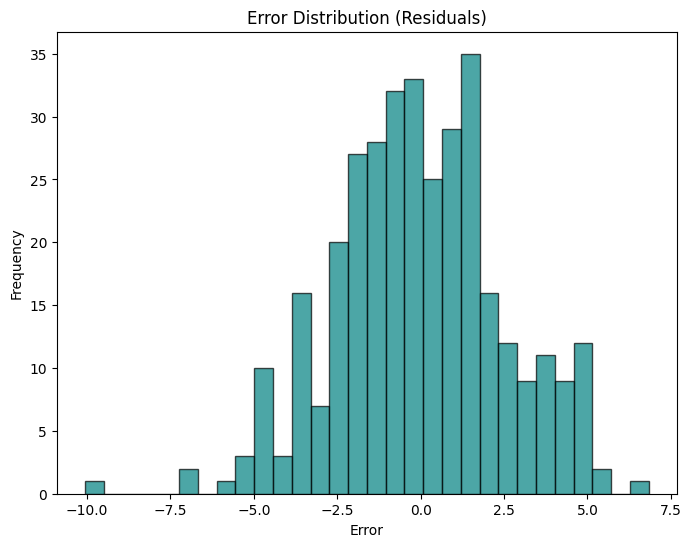

In [8]:
# Calculating errors (residuals) as the difference between actual and predicted values
errors = y_test.values - y_pred.flatten()  # Errors (Actual - Predicted)

# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a histogram to display the distribution of errors
plt.hist(errors, bins=30, color='teal', edgecolor='black', alpha=0.7)

# Adding a title to the plot
plt.title("Error Distribution (Residuals)")

# Labeling the x-axis as "Error"
plt.xlabel("Error")

# Labeling the y-axis as "Frequency"
plt.ylabel("Frequency")

# Displaying the plot
plt.show()

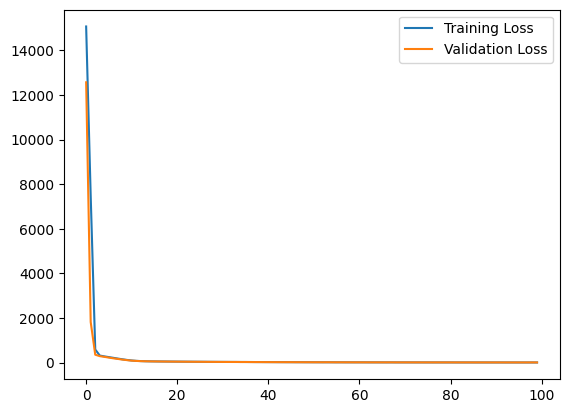

In [9]:
# Importing necessary library for visualization
import matplotlib.pyplot as plt

# Plotting the training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')

# Plotting the validation loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding a legend to distinguish between training and validation loss
plt.legend()

# Displaying the plot
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on test data
y_pred = model.predict(X_test)

# Convert continuous predictions to binary classes (example threshold: 0.5)
threshold = 0.5  # Adjust based on domain knowledge
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

# Calculate classification metrics
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
